# Revisiting the vaccine visualizations

Here is the original WSJ article that inspired this rework: http://graphics.wsj.com/infectious-diseases-and-vaccines/

### How to download the data

This notebook assumes that you have downloaded the Project Tycho data and placed it in a directory called `data` in the directory you ran the notebook. To download the data (instructions from [here](http://www.r-bloggers.com/recreating-the-vaccination-heatmaps-in-r/)):

1) Register and login to ["Project Tycho"](https://www.tycho.pitt.edu/)

2) Go to level 1 data, then Search and retrieve data

3) Now change a couple of options: geographic level := state; disease outcome := incidence

4) Add all states (highlight all at once with Ctrl+A)

5) Hit submit and scroll down to Click here to download results to excel

6) Open in excel and export to CSV

# Import all of the libraries we'll be using

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

sb.set_style('white')

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days
/Users/randal_olson/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Take a quick look at the data

In [3]:
!head data/POLIO_Incidence_1928-1969_20160304121200.csv

"Weekly Polio Incidence, 1928-1969"
"Data provided by Project Tycho, Data Version 1.0.0, released 28 November 2013."
YEAR,WEEK,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,GEORGIA,HAWAII,IDAHO,ILLINOIS,INDIANA,IOWA,KANSAS,KENTUCKY,LOUISIANA,MAINE,MARYLAND,MASSACHUSETTS,MICHIGAN,MINNESOTA,MISSISSIPPI,MISSOURI,MONTANA,NEBRASKA,NEVADA,NEW HAMPSHIRE,NEW JERSEY,NEW MEXICO,NEW YORK,NORTH CAROLINA,NORTH DAKOTA,OHIO,OKLAHOMA,OREGON,PENNSYLVANIA,RHODE ISLAND,SOUTH CAROLINA,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
1928,1,0.00,-,0.00,0.00,0.17,0.39,0.00,0.00,-,0.00,0.03,-,0.00,0.03,0.03,0.08,0.00,0.00,0.00,0.00,0.06,0.14,0.04,0.00,0.00,0.03,0.18,0.07,-,-,0.08,0.00,0.08,0.00,-,0.02,0.00,0.64,0.00,0.00,0.06,0.00,0.04,0.05,0.00,0.00,-,0.26,0.06,0.03,0.00
1928,2,0.00,-,0.00,0.00,0.15,0.20,0.00,0.00,-,0.00,0.00,-,0.00,0.01,0.03,-,0.22,0.00,0.05,0.13,0.06,0.14,0.04,0.04,0.00,0.06,0.00,0.07,-,-,

# Visualize the Polio data as a heatmap

''

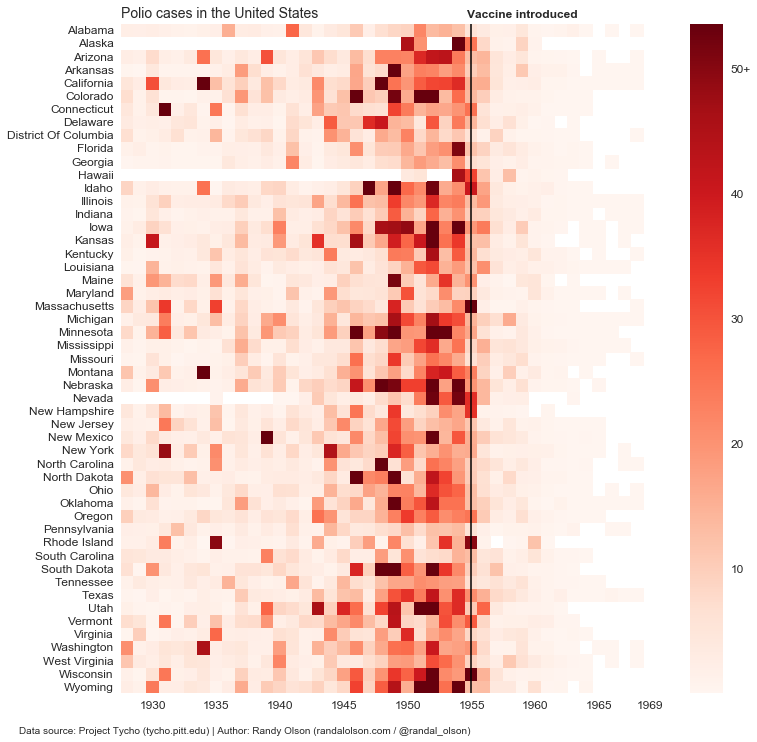

In [4]:
polio_data = pd.read_csv('data/POLIO_Incidence_1928-1969_20160304121200.csv', skiprows=2, na_values='-')

polio_years = list(polio_data['YEAR'].unique())
polio_states = polio_data.drop(['YEAR', 'WEEK'], axis=1).columns.values
polio_states = [state.title() for state in polio_states]

polio_data.drop(['WEEK'], axis=1, inplace=True)
polio_data = polio_data.groupby('YEAR').sum()
polio_data = polio_data.transpose().values

plt.figure(figsize=(12, 12))
sb.heatmap(polio_data, cmap='Reds', robust=True,
           xticklabels=[year if year % 5 == 0 or year == max(polio_years) else '' for year in polio_years],
           yticklabels=polio_states)
plt.plot([polio_years.index(1955) + 0.425, polio_years.index(1955) + 0.425],
         [0, 51],
         color='black', lw=1.5)

cax = plt.gcf().axes[-1]
cax.set_yticklabels([10, 20, 30, 40, '50+'])
cax.tick_params(labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(0, 51.5, 'Polio cases in the United States', fontsize=14)
plt.text(polio_years.index(1955) + 0.15, 51.5, 'Vaccine introduced', fontsize=12, weight='bold')
plt.text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Randy Olson (randalolson.com / @randal_olson)',
         fontsize=10)

plt.savefig('polio-cases-heatmap-sequential-colormap.png', bbox_inches='tight')
;

# Same process for the Measles data

''

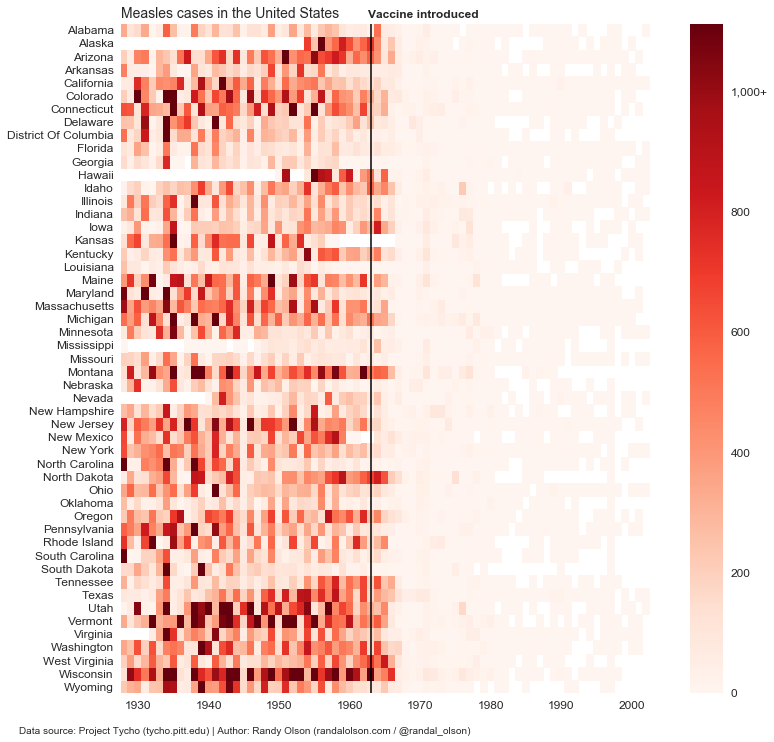

In [5]:
measles_data = pd.read_csv('data/MEASLES_Incidence_1928-2003_20160304120254.csv', skiprows=2, na_values='-')

measles_years = list(measles_data['YEAR'].unique())
measles_states = measles_data.drop(['YEAR', 'WEEK'], axis=1).columns.values
measles_states = [state.title() for state in measles_states]

measles_data.drop(['WEEK'], axis=1, inplace=True)
measles_data = measles_data.groupby('YEAR').sum()
measles_data = measles_data.transpose().values

plt.figure(figsize=(12, 12))
sb.heatmap(measles_data, cmap='Reds', robust=True,
           xticklabels=[year if year % 10 == 0 else '' for year in measles_years],
           yticklabels=measles_states)
plt.plot([polio_years.index(1963) + 0.425, polio_years.index(1963) + 0.425],
         [0, 51],
         color='black', lw=1.5)

cax = plt.gcf().axes[-1]
cax.set_yticklabels([0, 200, 400, 600, 800, '1,000+'])
cax.tick_params(labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(0, 51.5, 'Measles cases in the United States', fontsize=14)
plt.text(polio_years.index(1963) + 0.05, 51.5, 'Vaccine introduced', fontsize=12, weight='bold')
plt.text(-14.5, -3, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Randy Olson (randalolson.com / @randal_olson)',
         fontsize=10)

plt.savefig('measles-cases-heatmap-sequential-colormap.png', bbox_inches='tight')
;

# Visualize the Polio data as a line chart

''

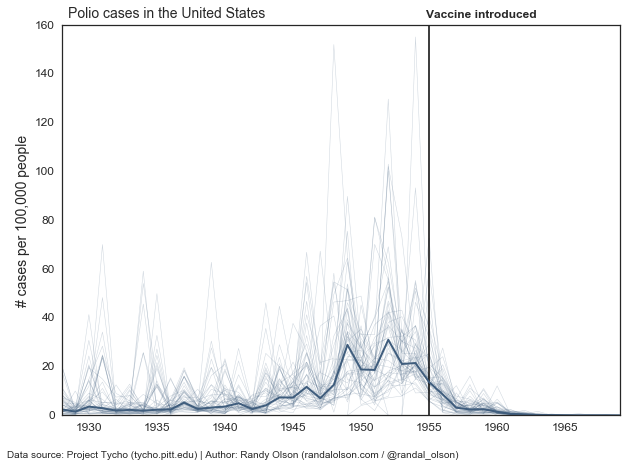

In [6]:
polio_data = pd.read_csv('data/POLIO_Incidence_1928-1969_20160304121200.csv', skiprows=2, na_values='-').fillna(0.)

polio_data.drop(['WEEK'], axis=1, inplace=True)
polio_data = polio_data.groupby('YEAR').sum()

polio_data.plot(color='#3F5D7D', alpha=0.25, lw=0.5, legend=False, figsize=(10, 7))
plt.plot([1955, 1955], [0, 160], color='black', lw=1.5)
polio_data.transpose().median().plot(color='#3F5D7D', lw=2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel('# cases per 100,000 people', fontsize=14)

plt.text(1928.5, 163, 'Polio cases in the United States', fontsize=14)
plt.text(1954.75, 163, 'Vaccine introduced', fontsize=12, weight='bold')
plt.text(1924, -17, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Randy Olson (randalolson.com / @randal_olson)',
         fontsize=10)

plt.savefig('polio-cases-line-chart-raw.png', bbox_inches='tight')
;

# Summarize Polio data with median + 95% CI

/Users/randal_olson/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3151: RuntimeWarning: Invalid value encountered in median for 2 results
  RuntimeWarning)


''

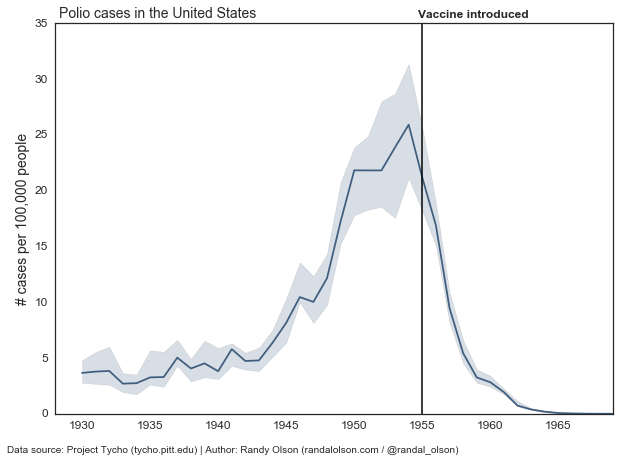

In [7]:
polio_data = pd.read_csv('data/POLIO_Incidence_1928-1969_20160304121200.csv', skiprows=2, na_values='-').fillna(0.)

polio_years = list(polio_data['YEAR'].unique())
polio_states = polio_data.drop(['YEAR', 'WEEK'], axis=1).columns.values
polio_states = [state.title() for state in polio_states]

polio_data.drop(['WEEK'], axis=1, inplace=True)
polio_data = polio_data.groupby('YEAR').sum()
polio_data = pd.rolling_mean(polio_data, 3)
polio_data = polio_data.transpose().values

plt.figure(figsize=(10, 7))
sb.tsplot(data=polio_data, ci=95, estimator=np.median, color='#3F5D7D')
plt.plot([polio_years.index(1955), polio_years.index(1955)], [0, 35], color='black', lw=1.5)

plt.yticks(fontsize=12)
plt.xticks(range(len(polio_years)), [year if year % 5 == 0 else '' for year in polio_years], fontsize=12)
plt.ylabel('# cases per 100,000 people', fontsize=14)

plt.text(0.3, 35.5, 'Polio cases in the United States', fontsize=14)
plt.text(polio_years.index(1955) - 0.3, 35.5, 'Vaccine introduced', fontsize=12, weight='bold')
plt.text(-3.5, -3.5, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Randy Olson (randalolson.com / @randal_olson)',
         fontsize=10)

plt.savefig('polio-cases-line-chart-statistics.png', bbox_inches='tight')
;

# Display the Polio data as small multiples